In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from scipy.interpolate import griddata

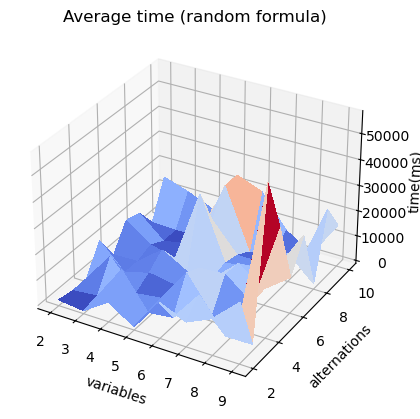

In [53]:
from mpl_toolkits.mplot3d import axes3d

data = pd.read_csv('random.csv', sep=';')
X = data["Variables"]
Y = data["Alternations"]
Z = data["Average"]
F = data["Fails"]
H = data["High"]
L = data["Low"]

x1 = np.linspace(X.min(), X.max(), len(X.unique()))
y1 = np.linspace(Y.min(), Y.max(), len(Y.unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((X, Y), Z, (x2, y2), method='cubic')


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x2, y2, z2, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)


ax.set_xlabel("variables")
ax.set_ylabel("alternations")
ax.set_zlabel("time(ms)")

plt.title("Average time (random formula)")
plt.savefig("average.png")

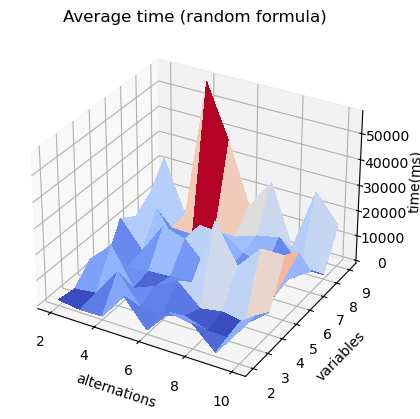

In [54]:
fig = plt.figure()
zz = griddata((Y, X), Z, (y2, x2), method='cubic')
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(y2, x2, zz, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)


ax.set_xlabel("alternations")
ax.set_ylabel("variables")
ax.set_zlabel("time(ms)")

plt.title("Average time (random formula)")
plt.savefig("averageRev.png")

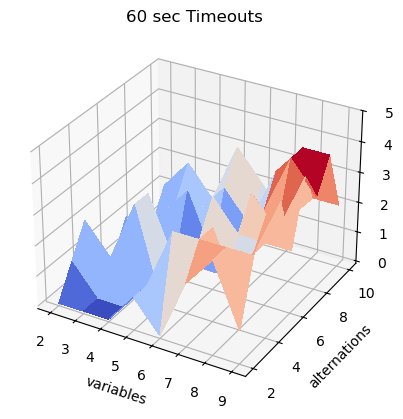

In [55]:
z3 = griddata((X, Y), F, (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x2, y2, z3, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
ax.set_zticks([0,1,2,3,4,5])

#fig.colorbar(surf, shrink=0.5, aspect=6)

ax.set_xlabel("variables")
ax.set_ylabel("alternations")
ax.set_zlabel("Timeouts")

plt.title("60 sec Timeouts")
plt.savefig("timeouts.png")

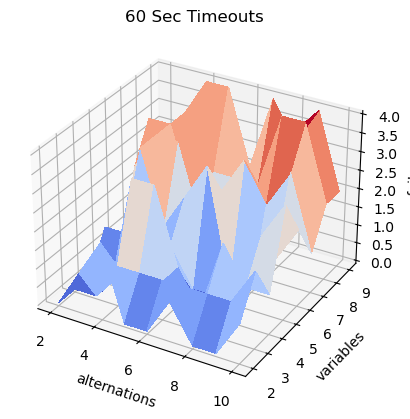

In [56]:
fig = plt.figure()
zz3 = griddata((Y, X), F, (y2, x2), method='cubic')
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(y2, x2, zz3, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)


ax.set_xlabel("alternations")
ax.set_ylabel("variables")
ax.set_zlabel("fails")

plt.title("60 Sec Timeouts")
plt.savefig("timeoutsRev.png")

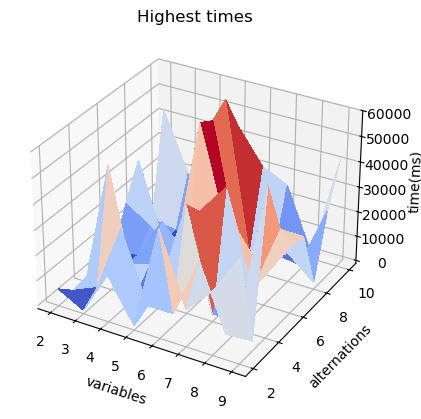

In [57]:
z4 = griddata((X, Y), H, (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x2, y2, z4, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
#ax.set_zticks([0,1,2,3,4,5])

#fig.colorbar(surf, shrink=0.5, aspect=6)

ax.set_xlabel("variables")
ax.set_ylabel("alternations")
ax.set_zlabel("time(ms)")

plt.title("Highest times")
plt.savefig("high.png")

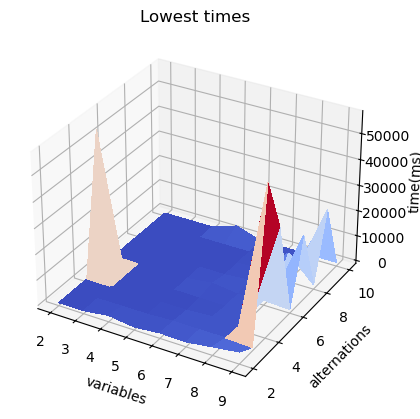

In [58]:
z5 = griddata((X, Y), L, (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x2, y2, z5, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
#ax.set_zticks([0,1,2,3,4,5])

#fig.colorbar(surf, shrink=0.5, aspect=6)

ax.set_xlabel("variables")
ax.set_ylabel("alternations")
ax.set_zlabel("time(ms)")

plt.title("Lowest times")
plt.savefig("low.png")

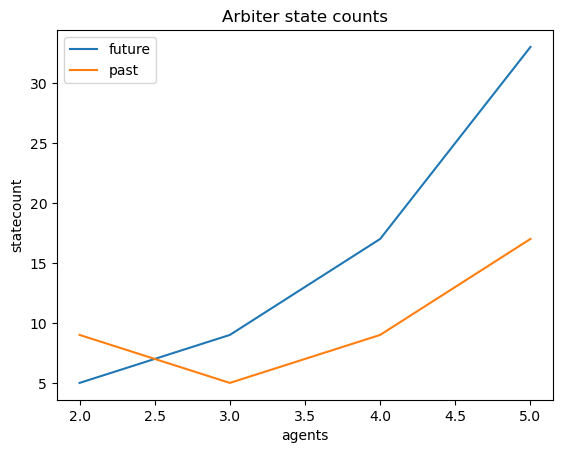

In [59]:
fig = plt.figure()
linx = [2,3,4,5]
plt.plot(linx,[5,9,17,33], label="future")
plt.plot(linx,[9,5,9,17], label="past")
plt.legend()
plt.title("Arbiter state counts")
plt.xlabel("agents")
plt.ylabel("statecount")
plt.savefig("arbiter.png")